In [162]:
from thunder import images
import numpy as np
# import skimage.color
# import skimage.io
import matplotlib.pyplot as plt
import thunder as td
import cv2
from showit import image, tile
from PIL import Image

In [163]:
!source bin/activate
from pyspark import SparkContext
sc = SparkContext()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/vanphu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_15238/3663952626.py", line 3, in <cell line: 3>
    sc = SparkContext()
  File "/home/vanphu/.local/lib/python3.8/site-packages/pyspark/context.py", line 144, in __init__
    SparkContext._ensure_initialized(self, gateway=gateway, conf=conf)
  File "/home/vanphu/.local/lib/python3.8/site-packages/pyspark/context.py", line 350, in _ensure_initialized
    raise ValueError(
ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at /tmp/ipykernel_15238/414631668.py:2 

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/vanphu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
   

vi da co SparkContext tu truoc nen chay lai se loi

In [164]:
img_cv = np.array(cv2.cvtColor(cv2.imread('selfies.jpg'), cv2.COLOR_BGR2RGB))
img = td.images.fromarray(img_cv, engine=sc)
img

Images
mode: spark
dtype: uint8
shape: (240, 240, 3)

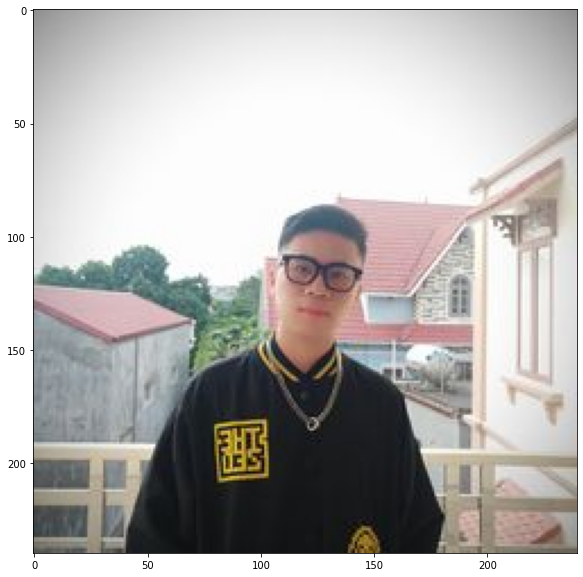

In [165]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [166]:
h, w = np.array(img).shape[:2]

In [167]:
def display_Hist(img, bin, c):
    Hist = []
    for i in range(bin):
        Hist.append(len(np.where(img == i)[0]))
    indx = [i for i in range(bin)]
    plt.plot(indx, Hist, c=c)

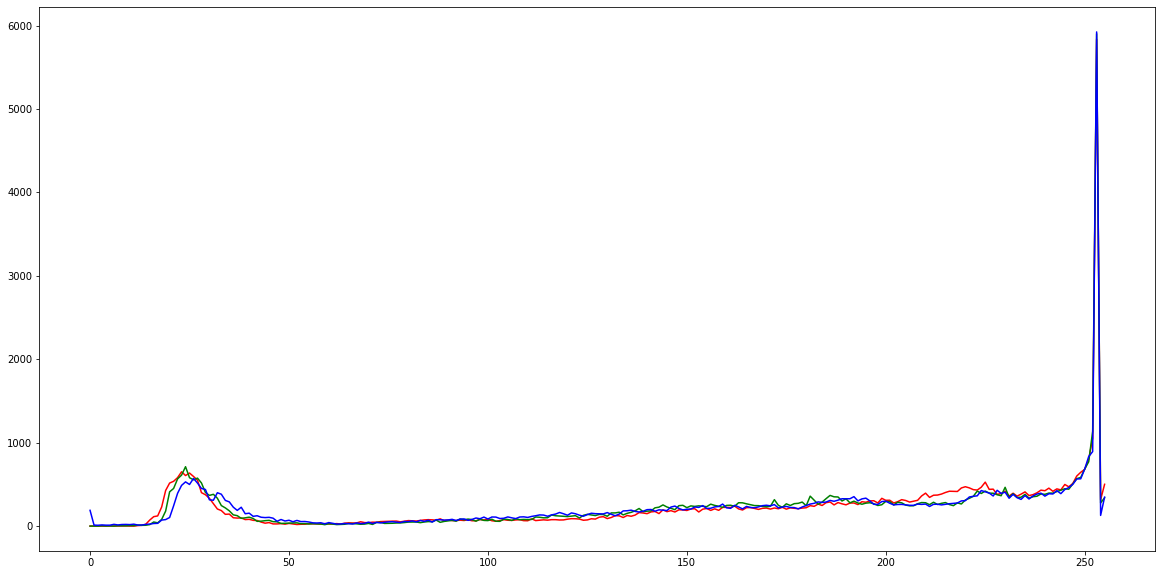

In [168]:
plt.figure(figsize=(20, 10))
display_Hist(np.array(img)[:, :, 0], 256, 'r')
display_Hist(np.array(img)[:, :, 1], 256, 'g')
display_Hist(np.array(img)[:, :, 2], 256, 'b')

/usr/local/lib/python3.8/dist-packages/bolt/spark/array.py:508: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rdd = filtered.map(lambda kv: (key_func(kv[0]), kv[1][value_slices]))


([<matplotlib.image.AxesImage at 0x7f9bab87b160>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid at 0x7f9b6af55df0>)

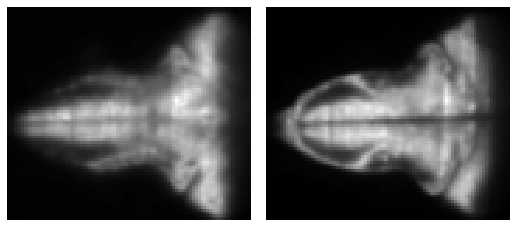

In [169]:
data = td.images.fromexample('fish', engine=sc)
tile(data[0])

/usr/local/lib/python3.8/dist-packages/bolt/spark/array.py:508: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rdd = filtered.map(lambda kv: (key_func(kv[0]), kv[1][value_slices]))


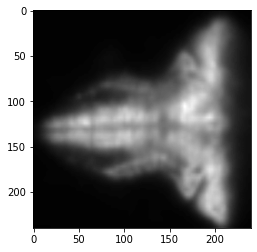

In [170]:
data = cv2.resize(np.array(data[0, 0]), dsize=(h, w))
plt.imshow(data, cmap='gray')

In [171]:
img2 = np.zeros((h, w, 3), dtype=uint8)
img2

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/vanphu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_15238/1585616769.py", line 1, in <cell line: 1>
    img2 = np.zeros((h, w, 3), dtype=uint8)
NameError: name 'uint8' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/vanphu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/vanphu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/vanphu/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/vanphu/.local/lib/python3.8/site

In [172]:
for i in range(3):
    img2[:, :, i] = np.array(data)[:, :]

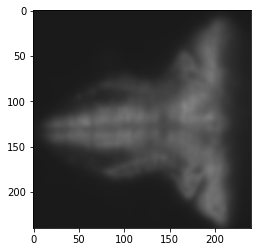

In [173]:
plt.imshow(np.array(img2, dtype=np.uint8))

In [174]:
img_fish = Image.fromarray(np.array(img2, dtype=np.uint8), mode='RGB')
img_self = Image.fromarray(np.array(img), mode='RGB')

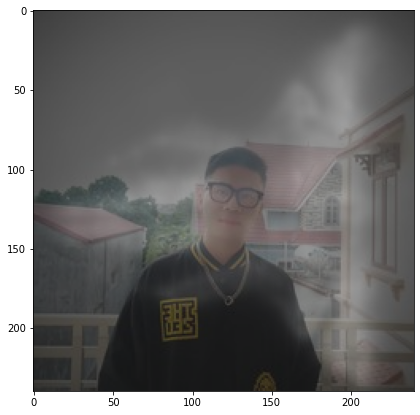

In [175]:
final = Image.blend(img_fish, img_self, 0.3)
plt.figure(figsize=(7, 7))
plt.imshow(final)

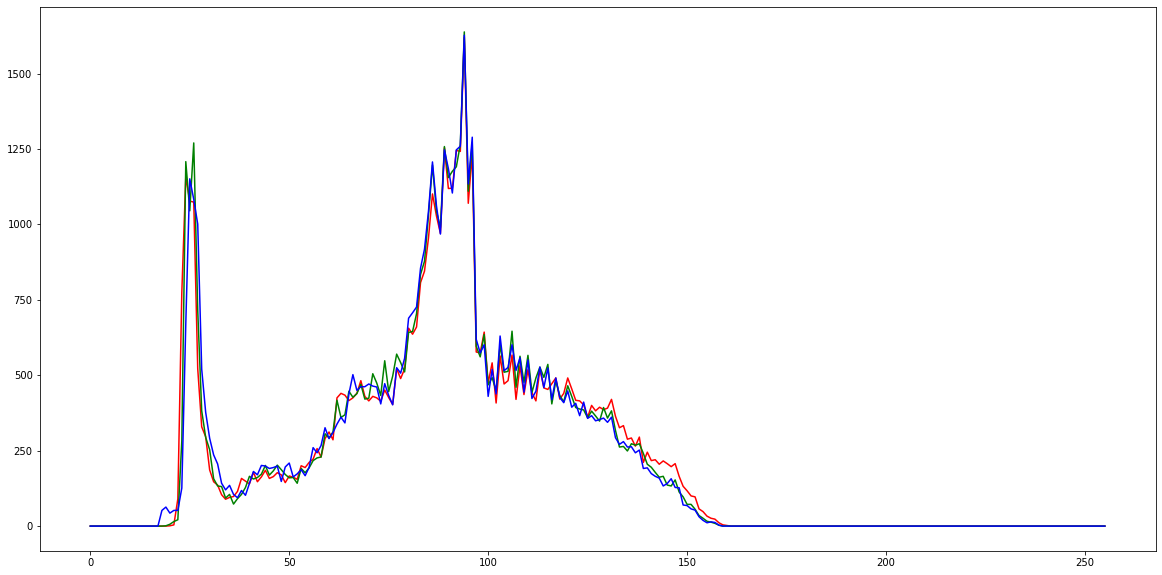

In [176]:
plt.figure(figsize=(20, 10))
display_Hist(np.array(final)[:, :, 0], 256, 'r')
display_Hist(np.array(final)[:, :, 1], 256, 'g')
display_Hist(np.array(final)[:, :, 2], 256, 'b')